# Importing modules and reading data

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

In [23]:
drug = "17-AAG"
df = pd.read_csv("./drug data/" + drug + ".csv")

### Preprocessing Data

In [24]:
x = pd.get_dummies(df.drop(['AUC', 'Cell line'], axis=1))
y = df["AUC"]

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

# Adding layers and training the model

In [26]:
model = Sequential()

In [27]:
model.add(Dense(units=32, activation='relu', input_dim=len(x_train.columns)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

D:\anaconda3\envs\TF\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compiling

In [28]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

### Training

In [29]:
model.fit(x_train,y_train, epochs=50,batch_size=8)

Epoch 1/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 0.5836
Epoch 2/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.4702
Epoch 3/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.4416
Epoch 4/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.4316
Epoch 5/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.4350
Epoch 6/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.4303
Epoch 7/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.4317
Epoch 8/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.4303
Epoch 9/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.4303
Epoch 10/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.4367
Epoch 11/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.4293
Epoch 12/50
95/95 ━━━━━━━━━━━━

# Predicition and Finding Correlation

### Setting up predictions and test case

In [30]:
values = model.predict(x_test)

pred = []
for i in values:
    pred.append(i[0])
pred = np.array(pred)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [31]:
y_test = y_test.to_numpy()

In [38]:
pred

array([0.79612404, 0.77826834, 0.804806  , 0.80757403, 0.79886645,
       0.8859594 , 0.8755038 , 0.930549  , 0.8759298 , 0.74866205,
       0.7786647 , 0.8826337 , 0.79995906, 0.78390414, 0.8114233 ,
       0.9003915 , 0.8866066 , 0.79361427, 0.76558685, 0.8366066 ,
       0.8976393 , 0.8533492 , 0.8224176 , 0.79902333, 0.8599935 ,
       0.87506133, 0.86783785, 0.90609074, 0.767926  , 0.8304843 ,
       0.79885674, 0.8298036 , 0.74357235, 0.7574555 , 0.8821408 ,
       0.8426241 , 0.8578225 , 0.73967385, 0.901031  , 0.8380531 ,
       0.7084227 , 0.783833  , 0.8442395 , 0.8511738 , 0.7655586 ,
       0.81969005, 0.77683395, 0.8467094 , 0.77949274, 0.7796243 ,
       0.7393725 , 0.7479093 , 0.9480192 , 0.78411394, 0.73493314,
       0.85259247, 0.80792344, 0.78227824, 0.80349827, 0.84680223,
       0.7961671 , 0.9151188 , 0.950788  , 0.8785135 , 0.90436035,
       0.8463185 , 0.804315  , 0.7824065 , 0.71086025, 0.77405727,
       0.82323253, 0.7646072 , 0.7353462 , 0.80847317, 0.97259

### Plotting Graph

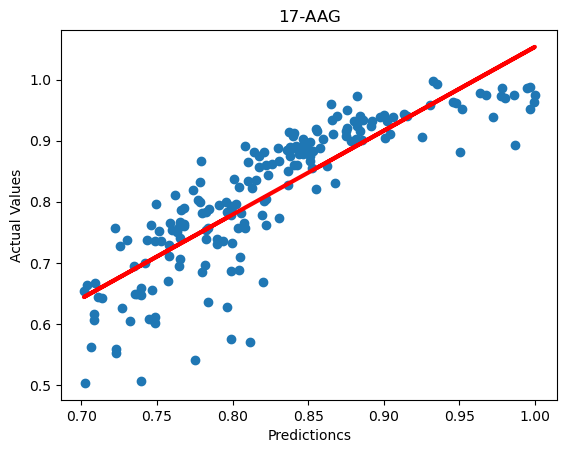

In [32]:
plt.scatter(pred,y_test)
plt.xlabel("Predictioncs")
plt.ylabel("Actual Values")
plt.title(drug)
m, b = np.polyfit(pred, y_test, 1)
plt.plot(pred, m*pred+b, lw=3, color="red")

# Finding Pearson correlation coefficient


In [33]:
import math

In [34]:
pred_n = pred - pred.mean()
y_test_n = y_test - y_test.mean()

In [35]:
num = sum(pred_n*y_test_n)

In [36]:
den = math.sqrt(sum(pred_n**2)*sum(y_test_n**2))

|PCC|Value|
|:----|:----|
|0 < r ≤  0.19|Very Low Correlation|
|0.2 ≤ r ≤ 0.39|Low Correlation|
|0.4 ≤ r ≤ 0.59|Moderate Correlation|
|0.6 ≤ r ≤ 0.79| High Correlation|
|0.8 ≤ r ≤ 1.0|Very High Correlation|


In [37]:
pcc = num/den
print("Pearson correlation coefficient comes out to be:",pcc)

Pearson correlation coefficient comes out to be: 0.846890462565342
